<a href="https://colab.research.google.com/github/hxchoongh/cv/blob/main/Chinese_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Gradient Boosting

In [ ]:
import os
from PIL import Image
import numpy as np

def get_image_paths(folder_path):
    image_extensions = [".jpg", ".jpeg", ".png"]
    image_paths = []
    for filename in os.listdir(folder_path):
        if any(ext in filename.lower() for ext in image_extensions):
            image_paths.append(os.path.join(folder_path, filename))
    return image_paths

data_folder = "Training_Data"
subfolders = ["San", "Ge", "Chou", "Pi", "Jiang"]

# Initialize X_train and y_train
X = []
y = []

for subfolder in subfolders:
    subfolder_path = os.path.join(data_folder, subfolder)
    image_paths = get_image_paths(subfolder_path)

    for image_path in image_paths:
        image = Image.open(image_path).convert("P")
        image = image.resize((1325,1325))  # Resize the image, following ICA requirement
        image_array = np.array(image) # convert the image in P mode to numpy array
        image_flattened = image_array.flatten()

        X.append(image_flattened)
        y.append(subfolder)

# Convert lists to numpy arrays
X = np.array(X)

y = np.array(y)

print("X_train shape:", X.shape)
print("y_train shape:", y.shape)

X_train shape: (297, 1755625)
y_train shape: (297,)


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# plt.imshow(image_rgb[13])
# plt.axis('off')
# plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state = 42)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=200)
transformed_images_pca = pca.fit_transform(X_train)

In [ ]:
transformed_images_pca

array([[-621.79411463, -284.5712575 ,   34.59126944, ...,   42.01869451,
         -69.91574298,   50.59616367],
       [-522.95624028, -206.86316584,  -51.0551117 , ...,   -5.58890581,
          -1.02397072,    5.09742816],
       [-684.51762702, -279.68425958,   27.78395813, ...,   -4.60375586,
          20.71356107,   17.68643691],
       ...,
       [-647.20951324, -273.70089914,    4.87360774, ...,  -35.37212194,
         166.267923  ,  -90.89688263],
       [-560.67769483, -175.7345539 ,  -30.28846954, ...,   13.31094984,
          15.46784577,  -11.24013549],
       [-680.70560657, -308.22968656,    8.94299674, ...,   23.99171211,
        -117.10969263,  -42.89964394]])

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Specify parameter distribution
parameters = {
    "n_estimators":[2,10,50,100,200],
    "max_depth":[3,4,5],
    "learning_rate":[0.01,0.1,0.05,0.2,0.5],
}

gbc_test = GradientBoostingClassifier()

grid_search2 = GridSearchCV(gbc_test, param_grid=parameters, n_jobs=-1, cv=5, verbose=2, scoring = 'accuracy')
# n jobs = -1, run using all processors, cv is the number of folds, split the dataset into 5
grid_search2.fit(transformed_images_pca, y_train)

# Print the best parameters
print("Best parameters: ", grid_search2.best_params_)

# Evaluate the best model on the train data
y_train_pred = grid_search2.predict(transformed_images_pca)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("The accuracy of the tuned GBC classifier on the train set is: ", round(accuracy_train,3))

# Evaluate the best model on the test data
# y_pred = random_search.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("The accuracy of the tuned GBC classifier on the test set is: ", round(accuracy,3))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
The accuracy of the tuned GBC classifier on the train set is:  1.0


In [ ]:
grid_search2.cv_results_

{'mean_fit_time': array([ 0.34948483,  1.53355899,  7.10112357, 13.78693328, 27.36841927,
         0.39908886,  1.82082577,  8.82908764, 17.79782901, 35.84663873,
         0.43074408,  2.18074594, 11.03884597, 22.01820102, 44.15321755,
         0.27706947,  1.36796608,  6.88934255, 13.80196686, 27.67042289,
         0.35742602,  1.79798317,  9.08543758, 18.10923305, 35.97114758,
         0.44258475,  2.24341769, 11.12855921, 22.14195557, 33.93208618,
         0.27661381,  1.37373023,  6.86373687, 13.78722124, 27.62110243,
         0.35554409,  1.79504075,  9.00023198, 17.99029703, 36.08977008,
         0.43255744,  2.19842935, 11.02403555, 22.08617063, 44.2048759 ,
         0.27696581,  1.37734017,  6.9078228 , 13.86336455, 27.12870817,
         0.35844703,  1.78921781,  9.05599871, 17.99309835, 21.60653286,
         0.43474908,  2.2011282 , 11.04997096, 17.71574059, 18.18591852,
         0.27699232,  1.38276691,  6.93564329, 12.65744176, 13.15250397,
         0.36312308,  1.81285906, 

In [ ]:
table_params = pd.concat([pd.DataFrame(grid_search2.cv_results_["params"]),pd.DataFrame(grid_search2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

In [ ]:
table_params.head(40)

,learning_rate,max_depth,n_estimators,Accuracy
0,0.01,3,2,0.250874
1,0.01,3,10,0.310901
2,0.01,3,50,0.366946
3,0.01,3,100,0.430398
4,0.01,3,200,0.449126
5,0.01,4,2,0.250874
6,0.01,4,10,0.340601
7,0.01,4,50,0.370929
8,0.01,4,100,0.411810
9,0.01,4,200,0.460307


In [ ]:
table_params.tail(35)

,learning_rate,max_depth,n_estimators,Accuracy
40,0.05,5,2,0.351922
41,0.05,5,10,0.385535
42,0.05,5,50,0.426415
43,0.05,5,100,0.426625
44,0.05,5,200,0.441719
45,0.20,3,2,0.333473
46,0.20,3,10,0.411810
47,0.20,3,50,0.505451
48,0.20,3,100,0.516632
49,0.20,3,200,0.532006


In [ ]:
gbc2 = GradientBoostingClassifier(n_estimators=200,
                                 learning_rate=0.05,
                                 max_depth=3)
# n_estimators: The number of boosting stages (i.e., trees)
# criterion: The function to measure the quality of a split
# learning_rate: The alpha value
# max_depth: the maximum depth of each tree

gbc2.fit(transformed_images_pca, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200)

In [ ]:
# Make predictions on the training set
y_train_pred = gbc2.predict(transformed_images_pca)
y_train_pred

array(['Ge', 'Pi', 'San', 'Ge', 'San', 'Ge', 'Ge', 'Ge', 'Ge', 'Ge', 'Ge',
       'Ge', 'Jiang', 'San', 'Pi', 'Pi', 'Ge', 'Chou', 'Chou', 'Ge', 'Ge',
       'Jiang', 'Chou', 'Jiang', 'Pi', 'Jiang', 'San', 'Pi', 'San',
       'Chou', 'Jiang', 'Jiang', 'San', 'San', 'Jiang', 'San', 'Ge',
       'Jiang', 'Chou', 'Pi', 'Jiang', 'Ge', 'Chou', 'Pi', 'Ge', 'San',
       'Ge', 'Chou', 'Chou', 'San', 'Jiang', 'Ge', 'Pi', 'Ge', 'Ge',
       'San', 'San', 'Pi', 'Chou', 'Ge', 'Jiang', 'San', 'San', 'Jiang',
       'Chou', 'Jiang', 'San', 'Jiang', 'Ge', 'San', 'Chou', 'Chou', 'Pi',
       'Ge', 'San', 'Chou', 'Ge', 'Chou', 'Ge', 'Ge', 'Jiang', 'Jiang',
       'Ge', 'Pi', 'Ge', 'Ge', 'Pi', 'San', 'Pi', 'Chou', 'Chou', 'Chou',
       'Jiang', 'San', 'Jiang', 'Chou', 'San', 'Ge', 'Pi', 'Ge', 'Chou',
       'Ge', 'Jiang', 'Jiang', 'Chou', 'Chou', 'San', 'Ge', 'Chou',
       'Chou', 'Ge', 'Pi', 'Jiang', 'Ge', 'Ge', 'San', 'Ge', 'Jiang',
       'Ge', 'Pi', 'Chou', 'Jiang', 'Chou', 'Pi', 'San', 'Pi', 'Ge'

In [ ]:
accuracy = accuracy_score(y_train, y_train_pred)
print("Training accuracy:", accuracy)

Training accuracy: 1.0


In [ ]:
x_test_pca = pca.transform(X_test)

In [ ]:
x_test_pca

array([[-6.15615996e+02, -2.04985194e+02, -2.85957447e+01, ...,
         8.41328569e+00, -1.96140562e+00,  2.80447435e+00],
       [ 4.33219185e+02,  5.39965121e+02, -3.83652754e+02, ...,
        -6.53076357e+01,  3.12549029e+01,  7.41521657e+00],
       [-5.65029174e+02, -3.30968937e+02, -1.94169966e+01, ...,
         6.38787522e+00, -3.05085920e+00,  1.57103743e+01],
       ...,
       [ 1.27331664e+03,  1.35571223e+03, -4.08365785e+02, ...,
        -3.04249688e+01,  1.83667952e+02,  5.94341568e+01],
       [-6.29311663e+02, -3.40807660e+02,  4.32828276e+01, ...,
        -1.60663905e+01,  6.45814157e+00,  5.99763542e-01],
       [-6.38530083e+02, -2.46934080e+02, -5.16187101e+01, ...,
        -7.00228736e+00,  7.14384819e+00,  3.78274232e+00]])

In [ ]:
# Make predictions on the test set
y_test_pred = gbc2.predict(x_test_pca)
y_test_pred

array(['Ge', 'Jiang', 'San', 'Ge', 'Ge', 'Ge', 'Ge', 'San', 'Ge', 'Ge',
       'Jiang', 'San', 'San', 'Chou', 'San', 'Ge', 'Pi', 'Chou', 'Jiang',
       'Chou', 'San', 'Ge', 'Ge', 'Pi', 'Ge', 'San', 'Ge', 'Jiang', 'San',
       'Jiang'], dtype='<U5')

In [ ]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy:", accuracy)

Training accuracy: 0.3333333333333333


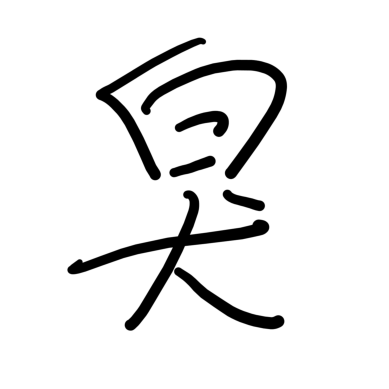

In [ ]:
# Predict for previously unseen data

test_chou = Image.open("New_Data/test_chou.png").convert("P").resize((1325, 1325))

plt.imshow(test_chou)
plt.axis('off')
plt.show()


In [ ]:

test_chou_array = np.array(test_chou)
test_chou_array_reshaped = test_chou_array.reshape(1, -1)
#image_array = np.array(image) # convert the image in P mode to numpy array
#test_image_flattened = test_image_array.flatten()

test_chou_array_reshaped

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
test_pca = pca.transform(test_chou_array_reshaped)

In [ ]:
test_pca

array([[ 2.29340475e+02,  4.91696959e+02, -4.21994824e+01,
         2.75618848e+02,  6.02772659e+02,  1.16938203e+02,
        -2.01456208e+02,  5.17867780e-01,  5.16461023e+01,
         1.01844438e+03,  3.47789799e+02, -2.40870721e+02,
         2.21513267e+02,  3.40766791e+01, -3.08958349e+02,
        -1.91638366e+02, -3.69680260e+02,  1.12348773e+02,
        -2.17784217e+02,  7.85680060e+02,  4.32567498e+02,
         4.67019764e+02, -5.30550122e+02,  5.63272616e+02,
        -5.23400095e+02,  8.63210457e+02,  7.30430558e+02,
         5.91066947e+02, -7.96277768e+02, -2.67217447e+02,
        -9.97515084e+02,  1.29415236e+03, -2.56337364e+02,
         7.11105143e+02, -2.25764854e+02,  1.56086483e+03,
        -2.06121885e+03,  6.66756031e+02,  3.85932488e+02,
         6.99406643e+02, -1.05718550e+03,  9.50646422e+01,
        -2.20798216e+02,  3.37902720e+01,  3.92077152e+01,
         5.10486584e+01, -1.72872329e+01,  2.35937246e+01,
         2.34233059e+01, -3.46264927e+01,  1.93168082e+0

In [ ]:
# Prediction for Chou
prediction = gbc2.predict(test_pca)

print("Prediction:", prediction)

Prediction: ['Chou']


In [ ]:
# Prediction for Ge
test_ge = Image.open("New_Data/test_ge.png").convert("P").resize((1325, 1325))

test_ge_array = np.array(test_ge)
test_ge_array_reshaped = test_ge_array.reshape(1, -1)
test_ge_pca = pca.transform(test_ge_array_reshaped)
prediction_ge = gbc2.predict(test_ge_pca)

print("Prediction:", prediction_ge)

Prediction: ['Ge']


In [ ]:
# Prediction for Ge
test_ge2 = Image.open("New_Data/test_ge2.png").convert("P").resize((1325, 1325))

test_ge2_array = np.array(test_ge2)
test_ge2_array_reshaped = test_ge2_array.reshape(1, -1)
test_ge2_pca = pca.transform(test_ge2_array_reshaped)
prediction_ge2 = gbc2.predict(test_ge2_pca)

print("Prediction:", prediction_ge2)

Prediction: ['Ge']


In [ ]:
# Prediction for Jiang
test_jiang = Image.open("New_Data/test_jiang.png").convert("P").resize((1325, 1325))

test_jiang_array = np.array(test_jiang)
test_jiang_array_reshaped = test_jiang_array.reshape(1, -1)
test_jiang_pca = pca.transform(test_jiang_array_reshaped)
prediction_jiang = gbc2.predict(test_jiang_pca)

print("Prediction:", prediction_jiang)

Prediction: ['Jiang']


In [ ]:
# Prediction for Pi
test_pi = Image.open("New_Data/test_pi.png").convert("P").resize((1325, 1325))

test_pi_array = np.array(test_pi)
test_pi_array_reshaped = test_pi_array.reshape(1, -1)
test_pi_pca = pca.transform(test_pi_array_reshaped)
prediction_pi = gbc2.predict(test_pi_pca)

print("Prediction:", prediction_pi)

Prediction: ['Pi']


In [ ]:
# Prediction for San
test_san = Image.open("New_Data/test_san.png").convert("P").resize((1325, 1325))

test_san_array = np.array(test_san)
test_san_array_reshaped = test_san_array.reshape(1, -1)
test_san_pca = pca.transform(test_san_array_reshaped)
prediction_san = gbc2.predict(test_san_pca)

print("Prediction:", prediction_san)

Prediction: ['San']
